**PROJECT**

---



**ATLIQ HOSPITALITY - ANALYSIS**

Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, Atliq Grands are losing its market share and revenue in the
luxury/business hotels category.


As a strategic move, the managing director of Atliq Grands
wanted to incorporate “Business and Data Intelligence” in order to regain their market share
and revenue. However, they do not have an in-house data analytics team to provide them with these insights. Their revenue management team had decided to hire a 3rd party service provider to
provide them with insights from their historical data.

Dataset contains Five tables:

**dim_date**


*  date
*  mmm yy
*  week no
*  day_type

**dim_hotels**



*  property_id        
*   property_name
*   category
*   city

**dim_rooms**


*   room_id
*   room_class

**Bookings**







*   booking_id
*   property_id
*   booking_date
*   check_in_date
*   checkout_date
*   room_category
*   booking_platform
*   ratings_given
*  booking_status
*   revenue_generated
*  revenue_realized

**Bookings_aggregated**



*  property_id    
*  check_in_date
*  room_category
*  successful_bookings
*  capacity
*  property_name


















In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
#dim_date table
dim_date=pd.read_csv("/content/dim_date.csv")
dim_date['day_type'] = dim_date['day_type'].replace(to_replace='weekeday', value='weekday')
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekday
2,03-May-22,May 22,W 19,weekday
3,04-May-22,May 22,W 19,weekday
4,05-May-22,May 22,W 19,weekday


In [39]:
#dim_hotels table
dim_hotels=pd.read_csv("/content/dim_hotels.csv")
print(dim_hotels.head())
dim_hotels.info()


   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [40]:
#dim_rooms table
dim_rooms=pd.read_csv("/content/dim_rooms.csv")
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [41]:
#Bookings_ag table
Bookings_ag=pd.read_csv("/content/fact_aggregated_bookings.csv")
Bookings_ag['property_name']=dim_hotels['property_name']
Bookings_ag.head()
Bookings_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
 5   property_name        25 non-null     object
dtypes: int64(3), object(3)
memory usage: 431.4+ KB


In [42]:
#Bookings table
Bookings=pd.read_csv("/content/fact_bookings.csv")
#Adding Property name and Successfull bookings to the Bookings table for visualizing data
Bookings['Property_name']=dim_hotels['property_name']
Bookings['Successful_bookings']=Bookings_ag['successful_bookings']
Bookings['Successful_bookings']=Bookings['Successful_bookings'].replace(np.nan, 0)
print(Bookings.info())
Bookings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_id           134590 non-null  object 
 1   property_id          134590 non-null  int64  
 2   booking_date         134590 non-null  object 
 3   check_in_date        134590 non-null  object 
 4   checkout_date        134590 non-null  object 
 5   no_guests            134590 non-null  int64  
 6   room_category        134590 non-null  object 
 7   booking_platform     134590 non-null  object 
 8   ratings_given        56683 non-null   float64
 9   booking_status       134590 non-null  object 
 10  revenue_generated    134590 non-null  int64  
 11  revenue_realized     134590 non-null  int64  
 12  Property_name        25 non-null      object 
 13  Successful_bookings  134590 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 14.4+ MB
None


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,Property_name,Successful_bookings
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,25.0
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Exotica,28.0
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq City,23.0
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Blu,13.0
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Bay,18.0


In [43]:
dim_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [44]:
dim_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [45]:
dim_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

In [46]:
Bookings_ag.isnull().sum()

property_id               0
check_in_date             0
room_category             0
successful_bookings       0
capacity                  0
property_name          9175
dtype: int64

There are no null values given in the 5 datasets  except ratings_given column

In [47]:
#To find the no of Cities where the Properties are present
print(dim_hotels['city'].unique())
dim_hotels['city'].nunique()

['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']


4

In [48]:
#Total no of Properties
print(dim_hotels['property_name'].count())


25


In [49]:
#Total no of Rooms available
print(Bookings_ag['capacity'].sum().round())


232576


In [50]:
#Total no of Successful Bookings
print(Bookings_ag['successful_bookings'].sum())

134590


In [51]:
#Booking rate
Booking_rate=(Bookings_ag['successful_bookings'].sum())/(Bookings_ag['capacity'].sum().round()) *100
Booking_rate.round()

58.0

In [52]:
#No of room Categories
print(Bookings_ag['room_category'].unique())
Bookings_ag['room_category'].nunique()

['RT1' 'RT2' 'RT3' 'RT4']


4

In [53]:
#Booking status
print(Bookings['booking_status'].unique())

['Checked Out' 'Cancelled' 'No Show']


In [54]:
#No of Booking Platform
print(Bookings['booking_platform'].unique())
Bookings['booking_platform'].nunique()

['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']


7

In [55]:
#Total Revenue Generated
import math

Bookings['revenue_generated'].sum().round()

2007546215

Total Revenue generated is approximately 2 billion.

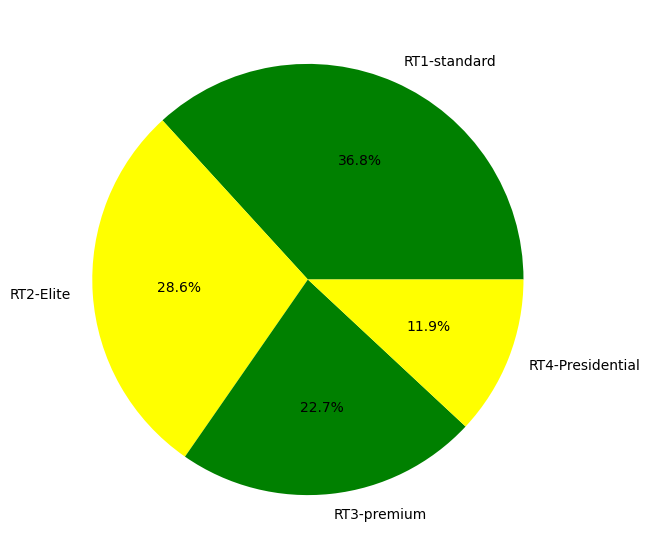

In [56]:
#Percengage of Bookings by Room Category
count = Bookings['room_category'].value_counts()
List_Of_Labels = ['RT1-standard', 'RT2-Elite', 'RT3-premium', 'RT4-Presidential']
plt.figure(figsize=(10,7))
plt.pie(count,labels=List_Of_Labels,autopct='%1.1f%%',colors=['Green','Yellow'])

plt.show()

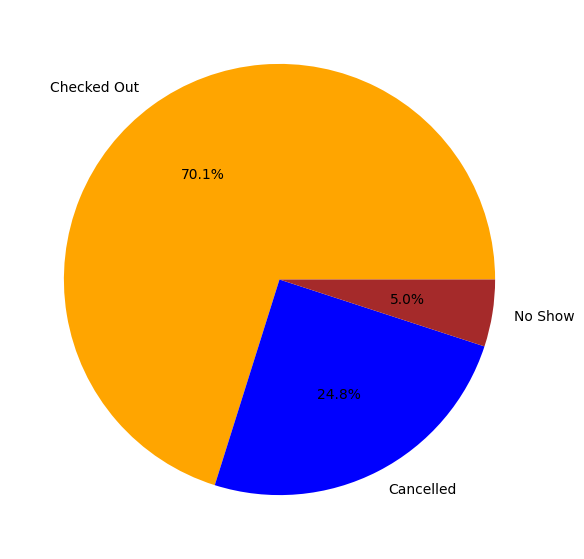

In [57]:
#Percentage of Bookings by Booking_status
count = Bookings['booking_status'].value_counts()
List_Of_Labels = ['Checked Out', 'Cancelled','No Show']
plt.figure(figsize=(10,7))
plt.pie(count,labels=List_Of_Labels,autopct='%1.1f%%',colors=['orange','blue','brown'])

plt.show()

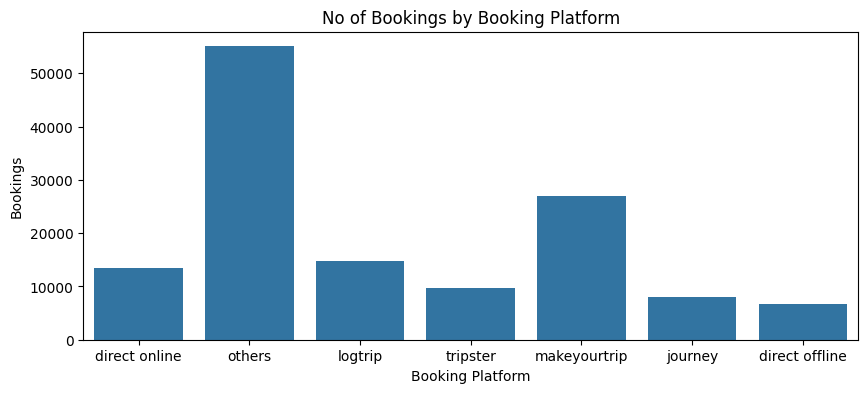

In [58]:

#No of Bookings by Booking Platform
plt.figure(figsize=(10, 4))
chart = sns.countplot(x="booking_platform", data=Bookings)
plt.title("No of Bookings by Booking Platform")
plt.xlabel("Booking Platform")
plt.ylabel("Bookings")
plt.show()





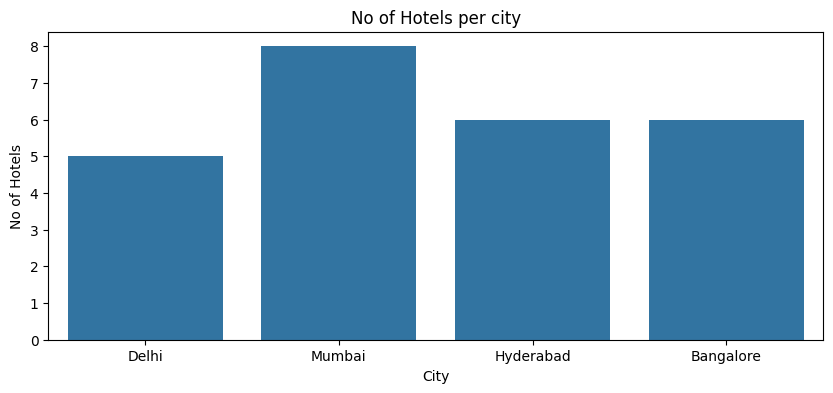

In [59]:
#Hotels per City
plt.figure(figsize=(10, 4))
chart = sns.countplot(x="city", data=dim_hotels)
plt.title("No of Hotels per city")
plt.xlabel("City")
plt.ylabel("No of Hotels")
plt.show()

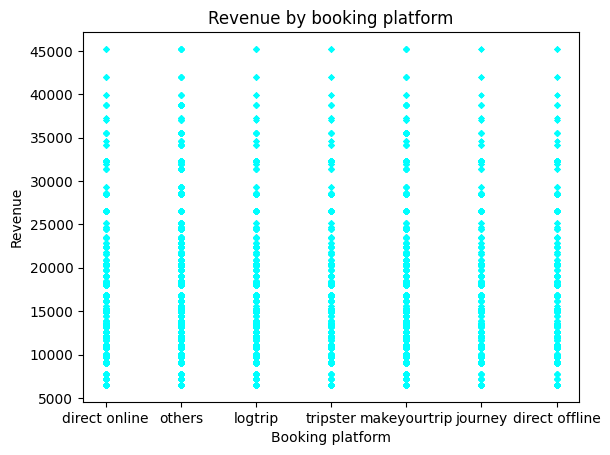

In [60]:
plt.scatter(Bookings['booking_platform'],Bookings['revenue_generated'],marker = 'D',color='cyan',s=5)#,facecolor='Green',edgecolor='Blue')
plt.xlabel("Booking platform")
plt.ylabel("Revenue")
plt.title("Revenue by booking platform")
plt.show()

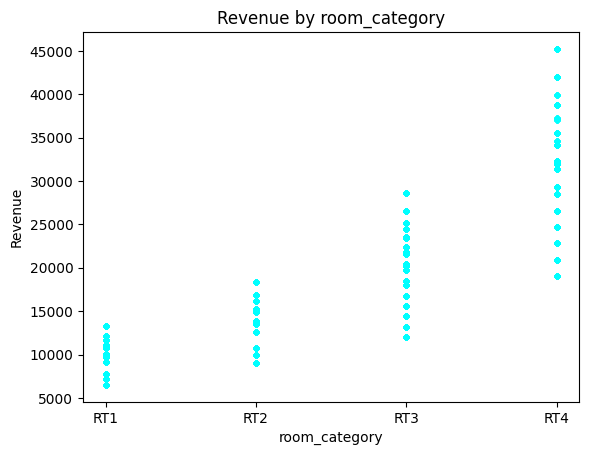

In [61]:
plt.scatter(Bookings['room_category'],Bookings['revenue_generated'],marker = 'D',color='cyan',s=5)#,facecolor='Green',edgecolor='Blue')
plt.xlabel("room_category")
plt.ylabel("Revenue")
plt.title("Revenue by room_category")
plt.show()

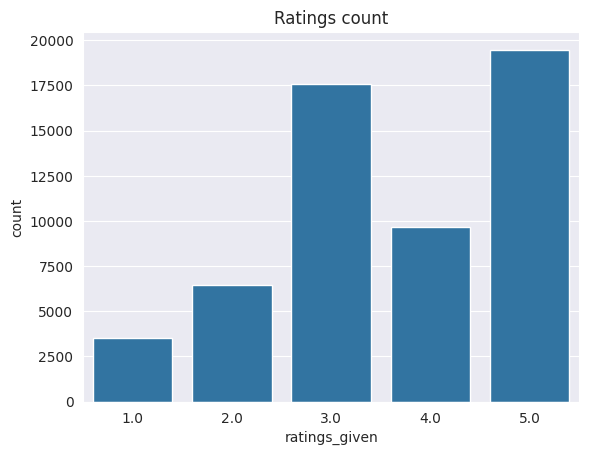

In [62]:
sns.set_style("darkgrid")
sns.countplot(x ='ratings_given', data = Bookings)
plt.title("Ratings count")
plt.show()

In [63]:
Bookings['ratings_given'].mean().round(1)

3.6

Average Ratings given is 3.6

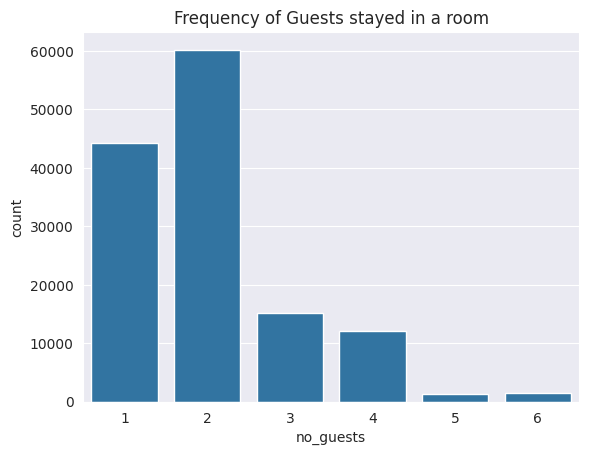

In [64]:
#Avearge no of Guests per Booking
sns.set_style("darkgrid")
sns.countplot(x ='no_guests', data = Bookings)
plt.title("Frequency of Guests stayed in a room")
plt.show()

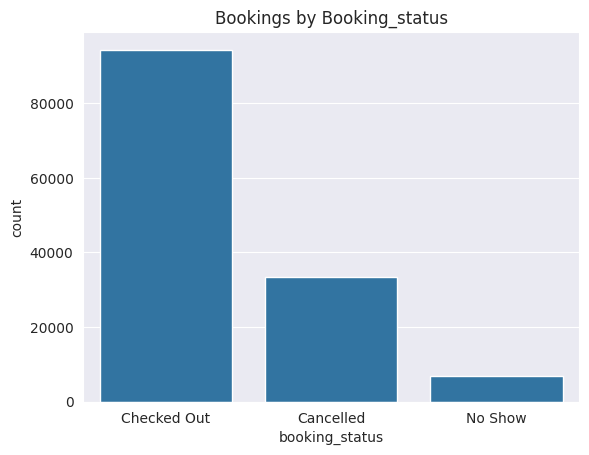

In [65]:
sns.set_style("darkgrid")
sns.countplot(x ='booking_status', data = Bookings)
plt.title("Bookings by Booking_status")
plt.show()

In [66]:
#Concatenated/joined all the tables for few visualization and analysis
df= pd.concat([dim_date,dim_hotels,Bookings_ag,Bookings], axis = 1 , join='outer')
Hotels_df = df.loc[:,~df.columns.duplicated()].copy() # To remove the duplicate columns
Hotels_df.head()

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,...,booking_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,Property_name,Successful_bookings
0,01-May-22,May 22,W 19,weekend,16558.0,Atliq Grands,Luxury,Delhi,01-May-22,RT1,...,2022-04-27,2022-05-02,3,direct online,1.0,Checked Out,10010,10010,Atliq Grands,25.0
1,02-May-22,May 22,W 19,weekday,16559.0,Atliq Exotica,Luxury,Mumbai,01-May-22,RT1,...,2022-04-30,2022-05-02,2,others,NaN,Cancelled,9100,3640,Atliq Exotica,28.0
2,03-May-22,May 22,W 19,weekday,16560.0,Atliq City,Business,Delhi,01-May-22,RT1,...,2022-04-28,2022-05-04,2,logtrip,5.0,Checked Out,9100,9100,Atliq City,23.0
3,04-May-22,May 22,W 19,weekday,16561.0,Atliq Blu,Luxury,Delhi,01-May-22,RT1,...,2022-04-28,2022-05-02,2,others,NaN,Cancelled,9100,3640,Atliq Blu,13.0
4,05-May-22,May 22,W 19,weekday,16562.0,Atliq Bay,Luxury,Delhi,01-May-22,RT1,...,2022-04-27,2022-05-02,4,direct online,5.0,Checked Out,10920,10920,Atliq Bay,18.0


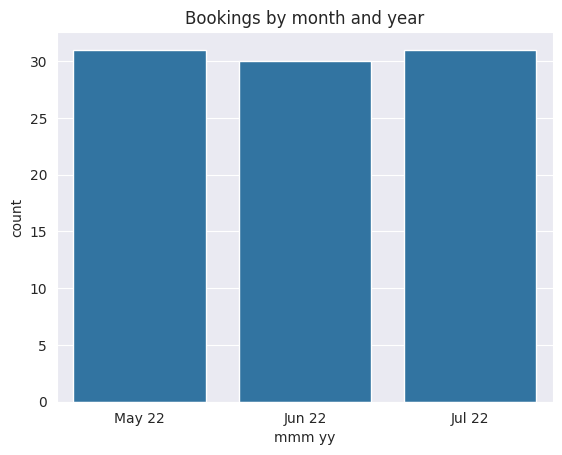

In [67]:
sns.set_style("darkgrid")
sns.countplot(x ='mmm yy',data = dim_date)
plt.title("Bookings by month and year")
plt.show()

In [68]:
Hotels_df.isnull().sum()

date                   134498
mmm yy                 134498
week no                134498
day_type               134498
property_id            134565
property_name          134565
category               134565
city                   134565
check_in_date          125390
room_category          125390
successful_bookings    125390
capacity               125390
booking_id                  0
booking_date                0
checkout_date               0
no_guests                   0
booking_platform            0
ratings_given           77907
booking_status              0
revenue_generated           0
revenue_realized            0
Property_name          134565
Successful_bookings         0
dtype: int64

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Atliq Seasons'),
  Text(0.0, 0, 'Atliq Bay'),
  Text(1.0, 0, 'Atliq Blu'),
  Text(2.0, 0, 'Atliq City'),
  Text(3.0, 0, 'Atliq Exotica'),
  Text(4.0, 0, 'Atliq Grands'),
  Text(5.0, 0, 'Atliq Palace'),
  Text(6.0, 0, 'Atliq Seasons'),
  Text(7.0, 0, '')])

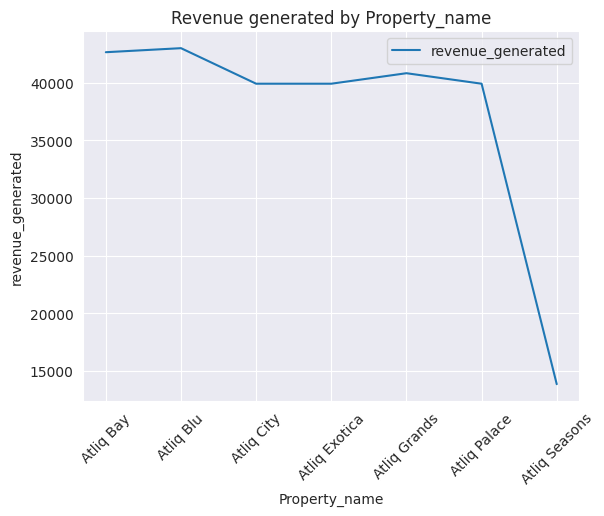

In [69]:
import matplotlib as mpt
Bookings.groupby('Property_name')['revenue_generated'].sum().plot()
mpt.pyplot.legend()
plt.xlabel('Property_name')
plt.ylabel('revenue_generated')
plt.title('Revenue generated by Property_name')
plt.xticks(rotation=45)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Atliq Seasons'),
  Text(0.0, 0, 'Atliq Bay'),
  Text(1.0, 0, 'Atliq Blu'),
  Text(2.0, 0, 'Atliq City'),
  Text(3.0, 0, 'Atliq Exotica'),
  Text(4.0, 0, 'Atliq Grands'),
  Text(5.0, 0, 'Atliq Palace'),
  Text(6.0, 0, 'Atliq Seasons'),
  Text(7.0, 0, '')])

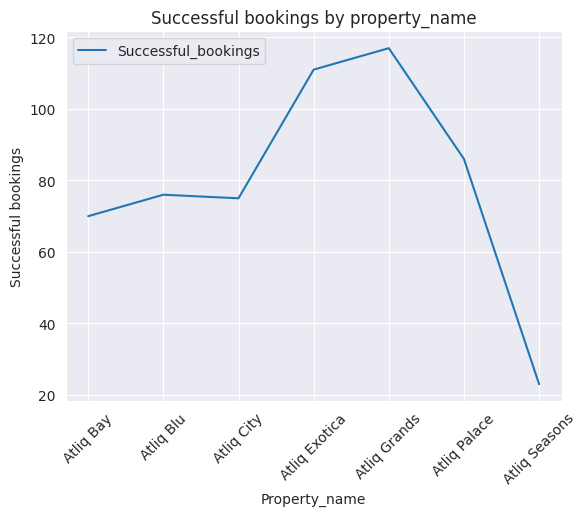

In [70]:
import matplotlib as mpt
Bookings.groupby('Property_name')['Successful_bookings'].sum().plot()
mpt.pyplot.legend()
plt.xlabel('Property_name')
plt.ylabel('Successful bookings')
plt.title('Successful bookings by property_name')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Bookings by property_id')

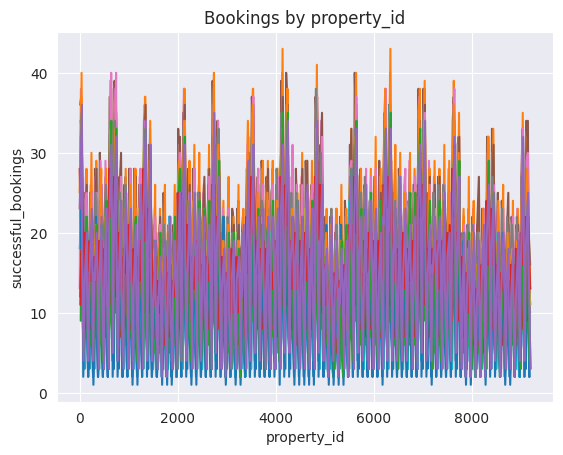

In [71]:
Bookings_ag.groupby('property_id')['successful_bookings'].plot()
plt.xlabel('property_id')
plt.ylabel('successful_bookings')
plt.title('Bookings by property_id')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Bangalore'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Delhi'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Hyderabad'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Mumbai'),
  Text(3.5, 0, '')])

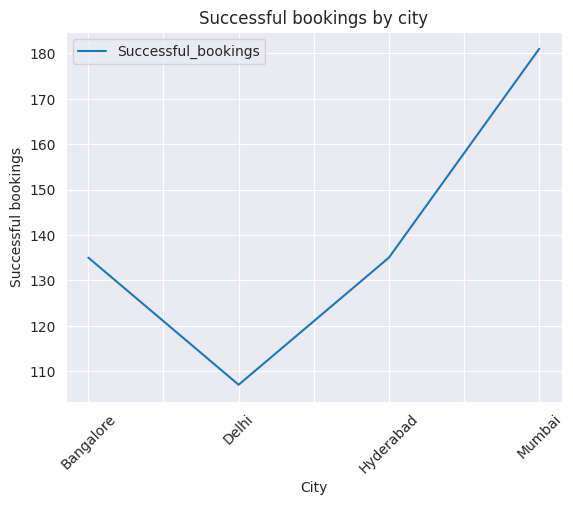

In [72]:
import matplotlib as mpt
Hotels_df.groupby('city')['Successful_bookings'].sum().plot()
mpt.pyplot.legend()
plt.xlabel('City')
plt.ylabel('Successful bookings')
plt.title('Successful bookings by city')
plt.xticks(rotation=45)

ANALYSIS MADE



* Atliq Properties are located in four cities-Delhi,Mumbai,Hyderabad and Bangalore
* There are about 25 Properties in total.
* Booking rate is about 58%
* Highest room bookings were done in the city Mumbai
* Atliq Grands records the Highest Successful bookings
* Atliq Seasons records the lowest Successful bookings
* Highest Bookings were done for Room category RT1-Standard
*   Average rating given was 3.6






